# Time Series Forecasting on Bitcoin Dataset

# Statistical Models
1. AR
2. MA
3. ARMA
4. AIRMA
5. SARIMA
6. AutoARIMA
7. Naive Forecast
8. ExponentialSmoothing (Requires Smoothening)

# Machine Learning Methods
9. Random Forest (TF-DF)
10. Gradient Boosted Trees (TF-DF)
11. Prophet (Facebook Kats) (Requires Smoothening)
12. Dense Model (Window = 7, Horizon = 1)
13. Dense Model (Window = 30, Horizon = 1)
14. Dense Model (Window = 30, Horizon = 7)
15. Conv1D
16. LSTM
17. Dense (Multivariate Time series)
18. N-BEATs Algorithm
19. Ensemble
20. Future Prediction model
21. Same as 1 but with turkey data introduced

# How to handle Time Series Data
Features a series should have to do time series forecasting
1. Stationarity : Statistical properties more or less, same over time

  a. Constant Mean

  b. Constant Variance

  c. No Seasonality

  Seasonality : Repeating trends or patterns over time

## How to check if a series is stationary
1. Visual Inspection
2. Global Vs Local check : Finding global mean and variance and comparing it with local mean and variance (There should not be much difference)
3. ADG (Augmented Dickey-Fuller) Test
4. KPPS Test

If our series is not stationary then we have to convert it into stationary methods are below
1. Differencing

    a. First Order Differencing Y(t) - Y(t-1)

    b. Second Order Differencing

    c. Log Operation to smooth exponential curves (Log(exp(x)=x)

    d. Seasonal Differencing Y(t) - Y(t - N)

    Use first order or second order differencing what ever make the series stationary

# Auto Regressive Models (Use PACF for getting the model)
Regression : Used to predict continuous value of an item based on certain parameters

Auto : Uses it's own past values to predict future values

AR(1) = First order auto regression = (Y(t) = C1 * Y(t-1) + C2)

We need to find how the current value is dependent on past values for that we use
1. ACF -> Auto Correlation Function
2. PACF -> Parital Auto Correlation Function

Correlation -> An indicator of relationship between two variables

Auto-Correlation -> Relationship of a variable with it's previous time period values (Lags)

Pearson's Correlation Coefficient: [-1,1] (1 -> Strong correlation)

ACF -> Measure the correlation between current time period and previous time lags . Direct and indirect effect of values in previous time lags

PACF -> Only direct effect of values in previous time lags


# Moving Average Models (Use ACF of getting the model)
In Auto Regression we were using past values to predict the future values in Moving Average we are using the error we made in previous prediction to do future prediction

Auto Regression : (Y(t) = C1 * Y(t-1) + C2 + E(t)) ----> AR(1)

Moving Average : (Y(t) = n + C1 * E(t-1) + E(t)) ----> MA(1)

If in ACF or PACF there are `X` no of bars above the threshold then that many order of model will be used means `MA model of order X` or `AR model of order X`


# ARMA (Auto Regressive and Moving Average) Models
A simple combination of AR and MA model
1. Auto Regression : Uses past values to make prediction : (Y(t) = C1 * Y(t-1) + C2 + E(t))
2. Moving Average : Uses past errors to make prediction : (Y(t) = n + C1 * E(t-1) + E(t))

3. ARMA Model : (Y(t) = n + C1 * E(t-1) + C2 * Y(t-1) + E(t)) ----> ARMA(1, 1)

## How to find the order of ARMA(p, q)
- ACF and PACF plots
- ACF will give value of q
- PACF will give value of p


# ARIMA (Auto Regressive Integrated Moving Average) models
- ARIMA is just ARMA, just does one simple operation on converting Non stationary series to stationary series before
- AR -> Auto Regressive
- I -> Differencing operation to convert non stationary series to stationary
- MA -> Moving Average
## ARIMA(p, d, q)
- p -> order of AR
- d -> order of differencing to get stationary series
- q -> order of MA

In [ ]:
!pip install pyspark
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=f842a9630c8a99ff5e0939554237988050d6fdc624125e8da49d09f69266e61b
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


# Data Importing and Preprocessing


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from pyspark import SparkContext, SparkConf
from itertools import product
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import tensorflow as tf
from tensorflow.keras import layers
import os

In [3]:
df = pd.read_csv("/content/bitcoin_2010-07-17_2024-09-09.csv")
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-09-08,2024-09-09,54116.16,55228.47,53694.23,54823.96,7.797330e+10,1.073878e+12
1,2024-09-07,2024-09-08,53976.04,54810.03,53767.28,54188.32,1.214459e+11,1.071141e+12
2,2024-09-06,2024-09-07,56209.17,56896.30,52738.00,53922.68,1.207873e+11,1.091997e+12
3,2024-09-05,2024-09-06,58006.56,58284.98,55835.00,56170.04,1.158143e+11,1.121929e+12
4,2024-09-04,2024-09-05,57644.03,58489.96,55737.91,57984.05,1.192145e+11,1.129078e+12


In [4]:
df.rename(columns={'Start':'Date'}, inplace = True)
df.drop(columns='End', inplace = True, axis=1)

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2024-09-08,54116.16,55228.47,53694.23,54823.96,7.797330e+10,1.073878e+12
1,2024-09-07,53976.04,54810.03,53767.28,54188.32,1.214459e+11,1.071141e+12
2,2024-09-06,56209.17,56896.30,52738.00,53922.68,1.207873e+11,1.091997e+12
3,2024-09-05,58006.56,58284.98,55835.00,56170.04,1.158143e+11,1.121929e+12
4,2024-09-04,57644.03,58489.96,55737.91,57984.05,1.192145e+11,1.129078e+12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5168 entries, 0 to 5167
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5168 non-null   object 
 1   Open        5168 non-null   float64
 2   High        5168 non-null   float64
 3   Low         5168 non-null   float64
 4   Close       5168 non-null   float64
 5   Volume      5168 non-null   float64
 6   Market Cap  5168 non-null   float64
dtypes: float64(6), object(1)
memory usage: 282.8+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5168 entries, 0 to 5167
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5168 non-null   datetime64[ns]
 1   Open        5168 non-null   float64       
 2   High        5168 non-null   float64       
 3   Low         5168 non-null   float64       
 4   Close       5168 non-null   float64       
 5   Volume      5168 non-null   float64       
 6   Market Cap  5168 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 282.8 KB


In [9]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2024-09-08,54116.16,55228.47,53694.23,54823.96,7.797330e+10,1.073878e+12
2024-09-07,53976.04,54810.03,53767.28,54188.32,1.214459e+11,1.071141e+12
2024-09-06,56209.17,56896.30,52738.00,53922.68,1.207873e+11,1.091997e+12
2024-09-05,58006.56,58284.98,55835.00,56170.04,1.158143e+11,1.121929e+12
2024-09-04,57644.03,58489.96,55737.91,57984.05,1.192145e+11,1.129078e+12


In [10]:
df.sort_index(ascending=True, inplace=True)
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2010-07-17,0.0500,0.0500,0.0500,0.0500,0.0,170803.152488
2010-07-18,0.0858,0.0858,0.0858,0.0858,0.0,294746.595000
2010-07-19,0.0808,0.0808,0.0808,0.0808,0.0,277570.220000
2010-07-20,0.0747,0.0747,0.0747,0.0747,0.0,256710.178548
2010-07-21,0.0792,0.0792,0.0792,0.0792,0.0,274308.375000


In [11]:
len(df)

5168

In [12]:
bitcoin_prices = pd.DataFrame(df['Close']).rename(columns={'Close':'Price'})
bitcoin_prices.head()

,Price
Date,
2010-07-17,0.0500
2010-07-18,0.0858
2010-07-19,0.0808
2010-07-20,0.0747
2010-07-21,0.0792


In [13]:
bitcoin_prices = bitcoin_prices.resample('D').mean()
bitcoin_prices.head()

,Price
Date,
2010-07-17,0.0500
2010-07-18,0.0858
2010-07-19,0.0808
2010-07-20,0.0747
2010-07-21,0.0792


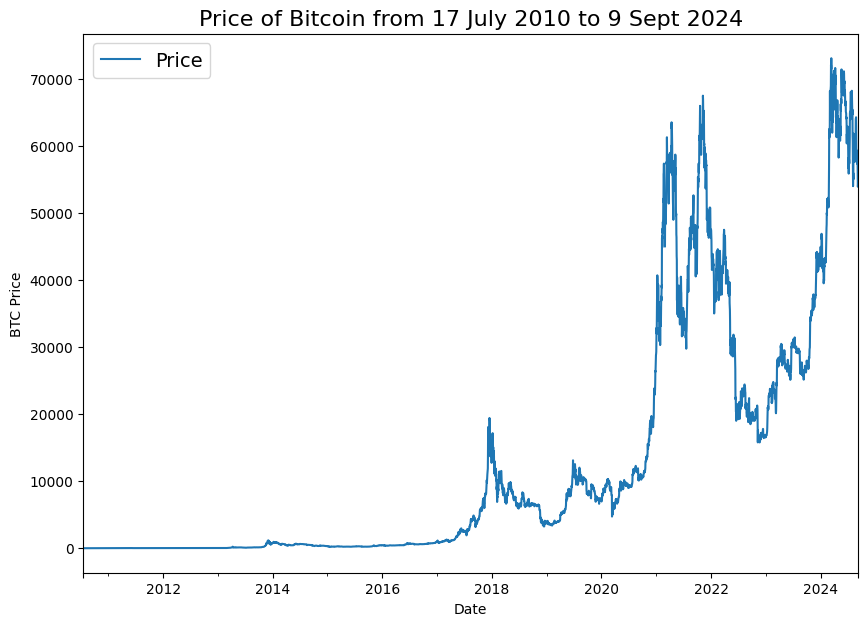

In [14]:
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title("Price of Bitcoin from 17 July 2010 to 9 Sept 2024", fontsize=16)
plt.legend(fontsize=14);

***Since the model is not stationary we have to make it stationary***

***Augmented Dickey Fuller Test***

- Null Hypothesis -> Time series is Non Stationary
- Alternate Hypothesis -> Time series is Stationary

`from statsmodels.tsa.stattools import adfuller`
Contains 4 params
1. **ADF Statistic** : The ADF Statistic is a test statistic that ADF calculates which is then compared with Critical value to decide if the series is stationary or not

  A More negative value of ADF indicates more strong evidence against the null hypothesis

  If ADF Statistic < Critical Value -> Reject the null hypothesis

  If ADF Statistic > Critical Value -> Failed to reject the null hypothesis

2. **P-value** : Probablity that helps you determine statistical significance of test

  If P-value < 0.5 -> Series is stationary

  If P-value > 0.5 -> Series is not stationary

3. **Number of Lags** : The number of lags represent how many previous values are used to define auto correlation in the data

  `autolag='AIC'` means take minimum amount of lags but very less information loss

4. **Critical Values** : Corresponds to test statistic threshold for various confidence levels (1%, 5%, 10%) to determine if series is stationary

***If ADF statistic is less than critical value at any significance level then you can reject the null hypothesis***

In [15]:
# Checking for stationarity using Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(bitcoin_prices['Price'], autolag='AIC')

print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. No. of lags : ", dftest[2])
print("4. No. of obeservations used of ADF Regression and Critical Values Calculations : ", dftest[4])
print("5. Critical Values : ")
for key, val in dftest[4].items():
  print("\t", key, ": ", val)

1. ADF :  -1.1179678425124402
2. P-value :  0.7078536090232751
3. No. of lags :  33
4. No. of obeservations used of ADF Regression and Critical Values Calculations :  {'1%': -3.431624361626218, '5%': -2.8621031332717526, '10%': -2.5670697559674203}
5. Critical Values : 
	 1% :  -3.431624361626218
	 5% :  -2.8621031332717526
	 10% :  -2.5670697559674203


In [16]:
## Our Time series is not stationary due to the fact that
'''
1. ADF > Critical Values
2. P-value > 0.5 , so the null hypothesis is accepted
'''
# Making the time series stationary by using Differencing
differenced_series = bitcoin_prices['Price'] - bitcoin_prices['Price'].shift(1)
differenced_series.head()

,Price
Date,
2010-07-17,NaN
2010-07-18,0.0358
2010-07-19,-0.0050
2010-07-20,-0.0061
2010-07-21,0.0045


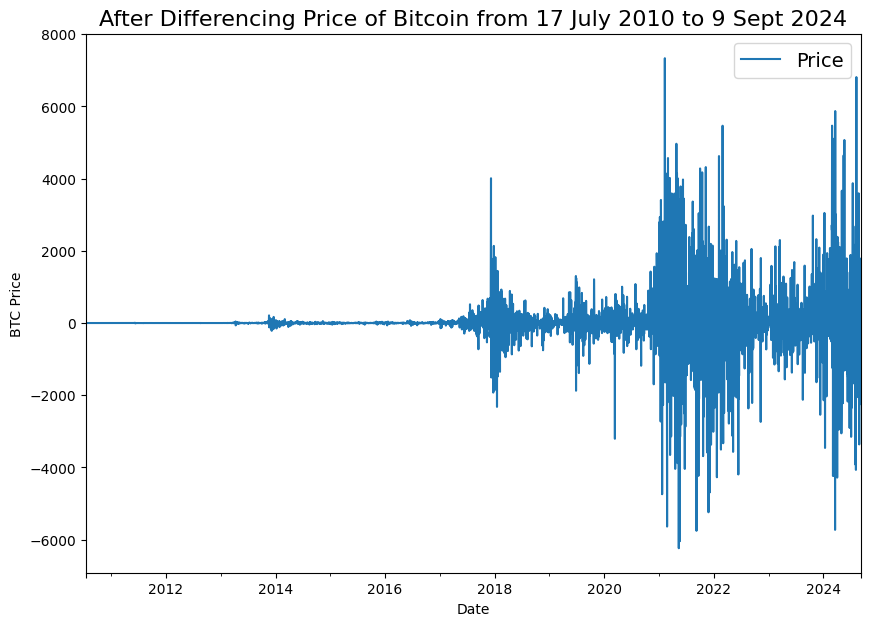

In [17]:
differenced_series.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title("After Differencing Price of Bitcoin from 17 July 2010 to 9 Sept 2024", fontsize=16)
plt.legend(fontsize=14);

In [18]:
after_differencing_adfuller = adfuller(differenced_series[1:], autolag='AIC')

print("1. ADF : ", after_differencing_adfuller[0])
print("2. P-value : ", after_differencing_adfuller[1])
print("3. No. of lags : ", after_differencing_adfuller[2])
print("4. No. of obeservations used of ADF Regression and Critical Values Calculations : ", after_differencing_adfuller[4])
print("5. Critical Values : ")
for key, val in after_differencing_adfuller[4].items():
  print("\t", key, ": ", val)

1. ADF :  -10.506744616106442
2. P-value :  1.049499578090943e-18
3. No. of lags :  32
4. No. of obeservations used of ADF Regression and Critical Values Calculations :  {'1%': -3.431624361626218, '5%': -2.8621031332717526, '10%': -2.5670697559674203}
5. Critical Values : 
	 1% :  -3.431624361626218
	 5% :  -2.8621031332717526
	 10% :  -2.5670697559674203


In [19]:
'''
Now our series is stationary due to the fact that
1. ADF < Critical Values
2. P-value < 0.5 , so the null hypothesis is rejected
'''

'\nNow our series is stationary due to the fact that\n1. ADF < Critical Values\n2. P-value < 0.5 , so the null hypothesis is rejected\n'

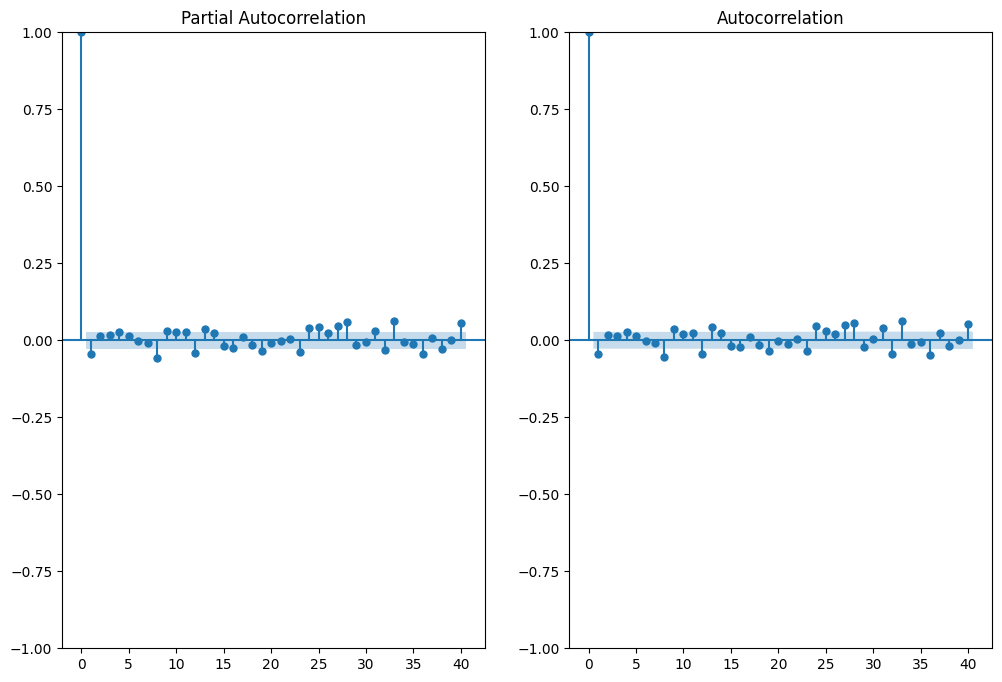

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,2,figsize=(12,8))
plot_pacf(differenced_series[1:].values.squeeze(), lags=40, ax=ax[0])
acf = plot_acf(differenced_series[1:].values.squeeze(), lags=40, ax=ax[1])
plt.show()

In [21]:
# Splitting Data into train and test set
split_size = int(0.93 * len(differenced_series[1:]))
train, test = differenced_series[1:split_size], differenced_series[split_size:]
len(train), len(test)

(4804, 363)

# Selecting Lags using the ACF and PACF graphs
PACF Significant lags : 1, 4, 8, 9, 12, 13, 16, 19, 23, 24, 25, 27, 28, 31, 32, 33, 36, 40

ACF Significant lags : 1, 4, 8, 9, 12, 13, 19, 23, 24, 27, 28, 31, 32, 33, 36, 40

# Model Selection using AIC and BIC

Each model has :     
1. Log Likelihood (l) : How strong the model is in fitting the data, more complex the model more good fitting of training data but is prone to overfit on testing data
2. No. of Paramters (k)
3. No. of samples used for fitting (n)

`AIC = 2k -2l` : Lower AIC via higher log likelihood or less parameters.
Model should have `low AIC` and high `l`

`BIC = ln(n) * k -2l` : Lower BIC via higher log likelihood or less parameters or less samples used in fitting.
Model should have `low BIC` and high `l` and trained on few `numbers on samples (low length of training data)`



# Model 1 : AR (Auto Regressive)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

pacf_ar_significant_lags = [1, 4, 8, 9, 12, 13, 16, 19, 23, 24, 25, 27, 28, 31, 32, 33, 36, 40]
ar_fitted_model_dict = {}

for idx, ar_order in enumerate(pacf_ar_significant_lags):
    model = ARIMA(train, order=(ar_order, 0, 0))
    result = model.fit()
    ar_fitted_model_dict[ar_order] = (ar_order, result)

aic_values = []
bic_values = []

for ar_order in pacf_ar_significant_lags:
    aic = ar_fitted_model_dict[ar_order][1].aic
    bic = ar_fitted_model_dict[ar_order][1].bic
    print(f'AR({ar_order}) AIC: {aic:.4f} and BIC: {bic:.4f}')
    aic_values.append(aic)
    bic_values.append(bic)

min_aic = min(aic_values)
max_aic = max(aic_values)
min_bic = min(bic_values)
max_bic = max(bic_values)

print(f'\nMinimum AIC: {min_aic:.4f}, Maximum AIC: {max_aic:.4f}')
print(f'Minimum BIC: {min_bic:.4f}, Maximum BIC: {max_bic:.4f}')

AR(1) AIC: 75807.7553 and BIC: 75827.1869
AR(4) AIC: 75805.7812 and BIC: 75844.6445
AR(8) AIC: 75794.8236 and BIC: 75859.5956
AR(9) AIC: 75773.3883 and BIC: 75844.6375
AR(12) AIC: 75762.2743 and BIC: 75852.9552
AR(13) AIC: 75761.9085 and BIC: 75859.0666
AR(16) AIC: 75762.8805 and BIC: 75879.4702
AR(19) AIC: 75756.5397 and BIC: 75892.5610
AR(23) AIC: 75740.6844 and BIC: 75902.6146
AR(24) AIC: 75721.8723 and BIC: 75890.2796
AR(25) AIC: 75723.4258 and BIC: 75898.3103
AR(27) AIC: 75712.0852 and BIC: 75899.9241
AR(28) AIC: 75702.2351 and BIC: 75896.5513
AR(31) AIC: 75686.5619 and BIC: 75900.3096
AR(32) AIC: 75676.7189 and BIC: 75896.9439
AR(33) AIC: 75646.0307 and BIC: 75872.7329
AR(36) AIC: 75641.2895 and BIC: 75887.4232
AR(40) AIC: 75631.3972 and BIC: 75903.4398

Minimum AIC: 75631.3972, Maximum AIC: 75807.7553
Minimum BIC: 75827.1869, Maximum BIC: 75903.4398


In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=bb144899cd59e8670951d6fa8e3c9a748e662e38b4c7f561754bdb4021f15a68
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
from pyspark import SparkContext, SparkConf

conf = SparkConf().setAppName("ARIMA_Model_Fitting")
sc = SparkContext.getOrCreate(conf=conf)

train_broadcast = sc.broadcast(train)

def fit_arima(ar_order):
    train_data = train_broadcast.value
    model = ARIMA(train_data, order=(ar_order, 0, 0))
    result = model.fit()
    return (ar_order, result.aic, result.bic)

ar_order_rdd = sc.parallelize(pacf_ar_significant_lags)
ar_results = ar_order_rdd.map(fit_arima).collect()

In [ ]:
aic_values = [result[1] for result in ar_results]
bic_values = [result[2] for result in ar_results]

min_aic = min(aic_values)
max_aic = max(aic_values)
min_bic = min(bic_values)
max_bic = max(bic_values)

for result in ar_results:
    ar_order, aic, bic = result
    print(f'AR({ar_order}) AIC: {aic:.4f} and BIC: {bic:.4f}')

print(f'\nMinimum AIC: {min_aic:.4f}, Maximum AIC: {max_aic:.4f}')
print(f'Minimum BIC: {min_bic:.4f}, Maximum BIC: {max_bic:.4f}')

AR(1) AIC: 75807.7553 and BIC: 75827.1869
AR(4) AIC: 75805.7812 and BIC: 75844.6445
AR(8) AIC: 75794.8236 and BIC: 75859.5956
AR(9) AIC: 75773.3883 and BIC: 75844.6375
AR(12) AIC: 75762.2743 and BIC: 75852.9552
AR(13) AIC: 75761.9085 and BIC: 75859.0666
AR(16) AIC: 75762.8805 and BIC: 75879.4702
AR(19) AIC: 75756.5397 and BIC: 75892.5610
AR(23) AIC: 75740.6844 and BIC: 75902.6146
AR(24) AIC: 75721.8723 and BIC: 75890.2796
AR(25) AIC: 75723.4258 and BIC: 75898.3103
AR(27) AIC: 75712.0852 and BIC: 75899.9241
AR(28) AIC: 75702.2351 and BIC: 75896.5513
AR(31) AIC: 75686.5619 and BIC: 75900.3096
AR(32) AIC: 75676.7189 and BIC: 75896.9439
AR(33) AIC: 75646.0307 and BIC: 75872.7329
AR(36) AIC: 75641.2895 and BIC: 75887.4232
AR(40) AIC: 75631.3972 and BIC: 75903.4398

Minimum AIC: 75631.3972, Maximum AIC: 75807.7553
Minimum BIC: 75827.1869, Maximum BIC: 75903.4398


According to AIC and BIC values 33 no. of lags seems to be the best

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(33, 0, 0))
result = model.fit()

In [ ]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 4804
Model:                ARIMA(33, 0, 0)   Log Likelihood              -37788.015
Date:                Wed, 18 Sep 2024   AIC                          75646.031
Time:                        14:11:24   BIC                          75872.733
Sample:                    07-18-2010   HQIC                         75725.647
                         - 09-11-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2339     12.209      0.429      0.668     -18.696      29.164
ar.L1         -0.0094      0.007     -1.433      0.152      -0.022       0.003
ar.L2          0.0053      0.006      0.839      0.4

In [ ]:
pred = result.predict(start=len(train), end=len(differenced_series[1:])-1, dynamic=False)

In [ ]:
pred.head()

,predicted_mean
2023-09-12,-16.739271
2023-09-13,-216.411776
2023-09-14,-136.076967
2023-09-15,72.079755
2023-09-16,73.159848


In [ ]:
# MSE
from sklearn.metrics import mean_squared_error

AR_model_mse_d = mean_squared_error(test, pred)
print(f"MSE on Differenced Series: {AR_model_mse_d}")

MSE on Differenced Series: 2281240.2966944096


In [ ]:
last_train_value = bitcoin_prices.iloc[split_size - 1]['Price']
pred_original_scale = [last_train_value + pred[0]]
for i in range(1, len(pred)):
    pred_original_scale.append(pred_original_scale[i-1] + pred[i])

AR_model_mse_rd = mean_squared_error(bitcoin_prices[split_size:].values, pred_original_scale)
print(f"MSE on Reverse Differenced Series: {AR_model_mse_rd}")

MSE on Reverse Differenced Series: 920494354.9860123


<ipython-input-83-90fea8d8bde1>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_original_scale = [last_train_value + pred[0]]
<ipython-input-83-90fea8d8bde1>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_original_scale.append(pred_original_scale[i-1] + pred[i])


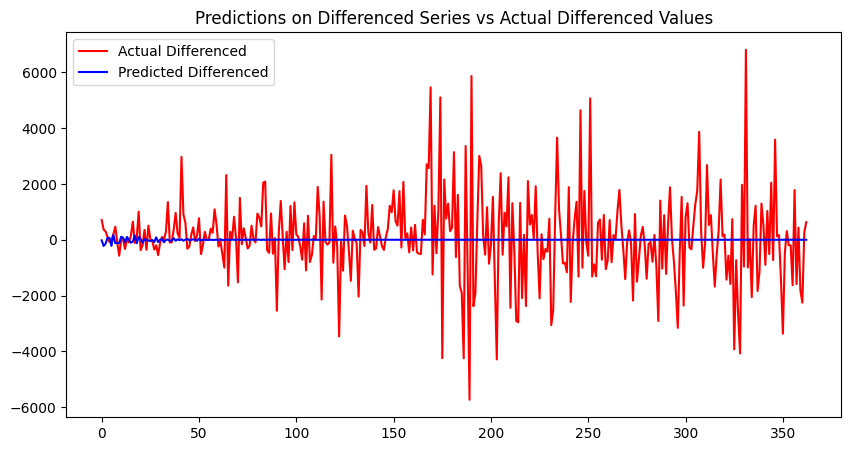

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test.reset_index(drop=True), label="Actual Differenced", color='red')
plt.plot(pred.reset_index(drop=True), label="Predicted Differenced", color='blue')
plt.title('Predictions on Differenced Series vs Actual Differenced Values')
plt.legend()
plt.show()

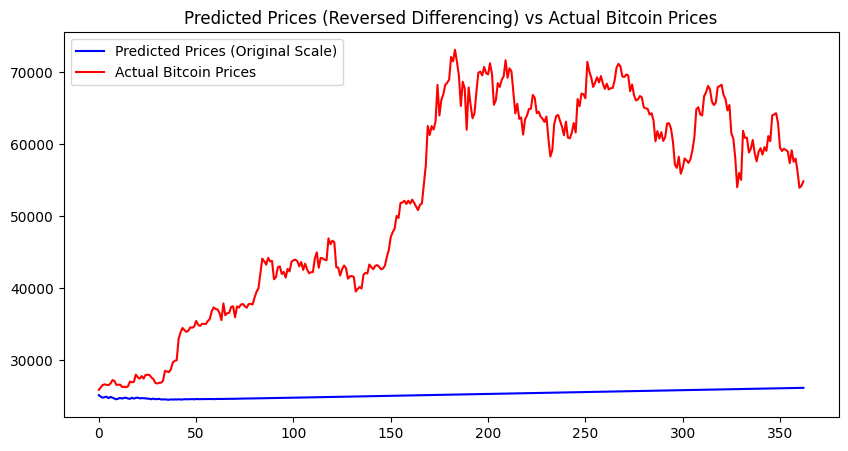

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(pred_original_scale, label="Predicted Prices (Original Scale)", color='blue')
plt.plot(bitcoin_prices[split_size:].values, label="Actual Bitcoin Prices", color='red')
plt.title('Predicted Prices (Reversed Differencing) vs Actual Bitcoin Prices')
plt.legend()
plt.show()

# Model 2 : MA

In [ ]:
acf_ma_significant_lags = [1, 4, 8, 9, 12, 13, 19, 23, 24, 27, 28, 31, 32, 33, 36, 40]

In [ ]:
from pyspark import SparkContext, SparkConf

conf = SparkConf().setAppName("ARIMA_Model_Fitting")
sc = SparkContext.getOrCreate(conf=conf)

train_broadcast = sc.broadcast(train)

def fit_arima(ma_order):
    train_data = train_broadcast.value
    model = ARIMA(train_data, order=(ma_order, 0, 0))
    result = model.fit()
    return (ma_order, result.aic, result.bic)

ma_order_rdd = sc.parallelize(acf_ma_significant_lags)
ma_results = ma_order_rdd.map(fit_arima).collect()

In [ ]:
aic_values = [result[1] for result in ma_results]
bic_values = [result[2] for result in ma_results]

min_aic = min(aic_values)
max_aic = max(aic_values)
min_bic = min(bic_values)
max_bic = max(bic_values)

for result in ma_results:
    ma_order, aic, bic = result
    print(f'MA({ma_order}) AIC: {aic:.4f} and BIC: {bic:.4f}')

print(f'\nMinimum AIC: {min_aic:.4f}, Maximum AIC: {max_aic:.4f}')
print(f'Minimum BIC: {min_bic:.4f}, Maximum BIC: {max_bic:.4f}')

MA(1) AIC: 75807.7553 and BIC: 75827.1869
MA(4) AIC: 75805.7812 and BIC: 75844.6445
MA(8) AIC: 75794.8236 and BIC: 75859.5956
MA(9) AIC: 75773.3883 and BIC: 75844.6375
MA(12) AIC: 75762.2743 and BIC: 75852.9552
MA(13) AIC: 75761.9085 and BIC: 75859.0666
MA(19) AIC: 75756.5397 and BIC: 75892.5610
MA(23) AIC: 75740.6844 and BIC: 75902.6146
MA(24) AIC: 75721.8723 and BIC: 75890.2796
MA(27) AIC: 75712.0852 and BIC: 75899.9241
MA(28) AIC: 75702.2351 and BIC: 75896.5513
MA(31) AIC: 75686.5619 and BIC: 75900.3096
MA(32) AIC: 75676.7189 and BIC: 75896.9439
MA(33) AIC: 75646.0307 and BIC: 75872.7329
MA(36) AIC: 75641.2895 and BIC: 75887.4232
MA(40) AIC: 75631.3972 and BIC: 75903.4398

Minimum AIC: 75631.3972, Maximum AIC: 75807.7553
Minimum BIC: 75827.1869, Maximum BIC: 75903.4398


According to AIC and BIC values 33 no. of lags seems to be the best

In [ ]:
model = ARIMA(train, order=(0, 0, 33))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 4804
Model:                ARIMA(0, 0, 33)   Log Likelihood              -37792.960
Date:                Wed, 18 Sep 2024   AIC                          75655.920
Time:                        17:26:06   BIC                          75882.622
Sample:                    07-18-2010   HQIC                         75735.537
                         - 09-11-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2339     11.932      0.439      0.661     -18.152      28.620
ma.L1         -0.0097      0.007     -1.404      0.160      -0.023       0.004
ma.L2          0.0066      0.007      1.008      0.3

In [ ]:
pred = result.predict(start=len(train), end=len(differenced_series[1:])-1, dynamic=False)

In [ ]:
pred.head()

,predicted_mean
2023-09-12,-55.523511
2023-09-13,-177.866224
2023-09-14,-215.946760
2023-09-15,68.313156
2023-09-16,137.973930


In [ ]:
MA_model_mse_d = mean_squared_error(test, pred)
print(f"MSE on Differenced Series: {MA_model_mse_d}")


MSE on Differenced Series: 2281605.3779048636


In [ ]:
last_train_value = bitcoin_prices.iloc[split_size - 1]['Price']
pred_original_scale = [last_train_value + pred[0]]
for i in range(1, len(pred)):
    pred_original_scale.append(pred_original_scale[i-1] + pred[i])

MA_model_mse_rd = mean_squared_error(bitcoin_prices[split_size:].values, pred_original_scale)
print(f"MSE on Reverse Differenced Series: {MA_model_mse_rd}")

MSE on Reverse Differenced Series: 909520960.4033629


<ipython-input-32-2274c02c8a8a>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_original_scale = [last_train_value + pred[0]]
<ipython-input-32-2274c02c8a8a>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_original_scale.append(pred_original_scale[i-1] + pred[i])


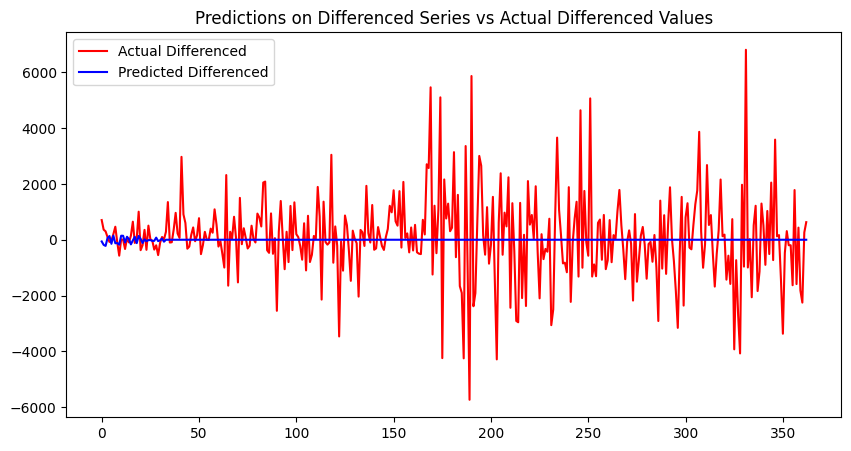

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test.reset_index(drop=True), label="Actual Differenced", color='red')
plt.plot(pred.reset_index(drop=True), label="Predicted Differenced", color='blue')
plt.title('Predictions on Differenced Series vs Actual Differenced Values')
plt.legend()
plt.show()

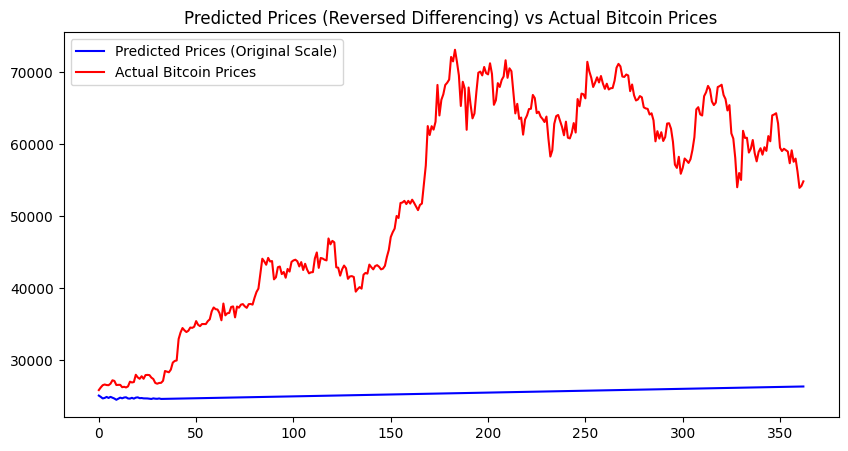

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(pred_original_scale, label="Predicted Prices (Original Scale)", color='blue')
plt.plot(bitcoin_prices[split_size:].values, label="Actual Bitcoin Prices", color='red')
plt.title('Predicted Prices (Reversed Differencing) vs Actual Bitcoin Prices')
plt.legend()
plt.show()

# Model 3 : ARMA

In [ ]:
conf = SparkConf().setAppName("ARIMA_Model_Fitting")
sc = SparkContext.getOrCreate(conf=conf)

train_broadcast = sc.broadcast(train)

In [ ]:
pacf_ar_significant_lags = [1, 4, 33]
acf_ma_significant_lags = [1, 4, 33]
def fit_arma(ar_order, ma_order):
    train_data = train_broadcast.value
    model = ARIMA(train_data, order=(ar_order, 0, ma_order))
    result = model.fit()
    return (ar_order, ma_order, result.aic, result.bic)

arma_orders = list(product(pacf_ar_significant_lags, acf_ma_significant_lags))
arma_order_rdd = sc.parallelize(arma_orders)
arma_results = arma_order_rdd.map(lambda orders: fit_arma(orders[0], orders[1])).collect()

In [ ]:
aic_values = [result[1] for result in arma_results]
bic_values = [result[2] for result in arma_results]

min_aic = min(aic_values)
max_aic = max(aic_values)
min_bic = min(bic_values)
max_bic = max(bic_values)

for result in arma_results:
    ar_order, ma_order, aic, bic = result
    print(f'AR({ar_order}) MA({ma_order}) AIC: {aic:.4f} and BIC: {bic:.4f}')

print(f'\nMinimum AIC: {min_aic:.4f}, Maximum AIC: {max_aic:.4f}')
print(f'Minimum BIC: {min_bic:.4f}, Maximum BIC: {max_bic:.4f}')

In [ ]:
model = ARIMA(train, order=(15, 0, 15))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
pred = result.predict(start=len(train), end=len(differenced_series[1:])-1, dynamic=False)
pred.head()

,predicted_mean
2023-09-12,3.902876
2023-09-13,9.525486
2023-09-14,-90.820078
2023-09-15,-114.112130
2023-09-16,139.012090


In [ ]:
ARMA_model_mse_d = mean_squared_error(test, pred)
print(f"MSE on Differenced Series: {ARMA_model_mse_d}")
last_train_value = bitcoin_prices.iloc[split_size - 1]['Price']
pred_original_scale = [last_train_value + pred[0]]
for i in range(1, len(pred)):
    pred_original_scale.append(pred_original_scale[i-1] + pred[i])

ARMA_model_mse_rd = mean_squared_error(bitcoin_prices[split_size:].values, pred_original_scale)
print(f"MSE on Reverse Differenced Series: {ARMA_model_mse_rd}")

MSE on Differenced Series: 2281191.470484419
MSE on Reverse Differenced Series: 873681902.5750899


<ipython-input-54-27ec12996041>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_original_scale = [last_train_value + pred[0]]
<ipython-input-54-27ec12996041>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_original_scale.append(pred_original_scale[i-1] + pred[i])


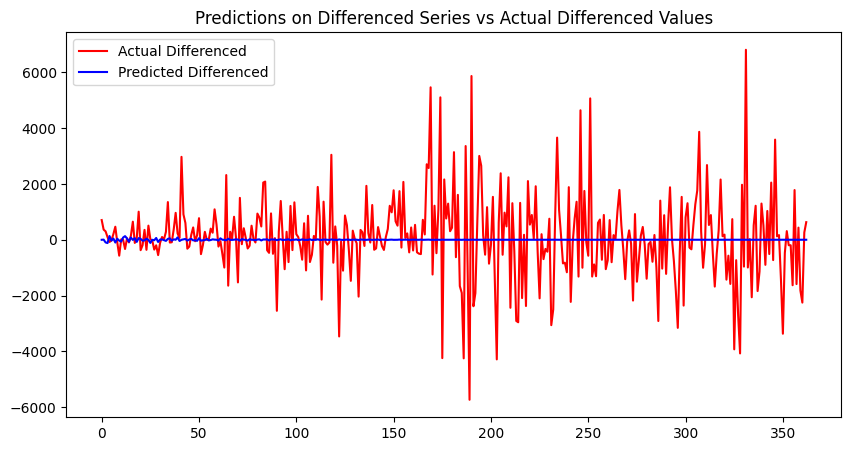

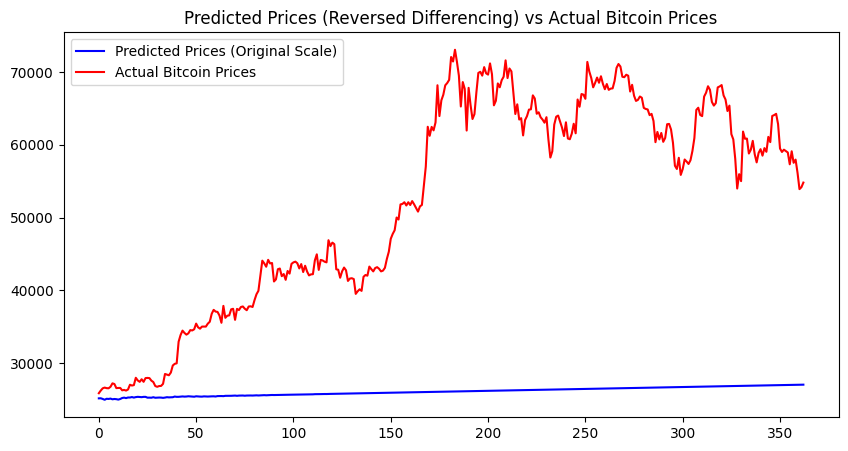

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test.reset_index(drop=True), label="Actual Differenced", color='red')
plt.plot(pred.reset_index(drop=True), label="Predicted Differenced", color='blue')
plt.title('Predictions on Differenced Series vs Actual Differenced Values')
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(pred_original_scale, label="Predicted Prices (Original Scale)", color='blue')
plt.plot(bitcoin_prices[split_size:].values, label="Actual Bitcoin Prices", color='red')
plt.title('Predicted Prices (Reversed Differencing) vs Actual Bitcoin Prices')
plt.legend()
plt.show()

# Model 4 : ARIMA

In [ ]:
pacf_ar_significant_lags = [4, 33]
acf_ma_significant_lags = [4, 33]
def fit_arma(ar_order, ma_order):
    train_data = train_broadcast.value
    model = ARIMA(train_data, order=(ar_order, 1, ma_order))
    result = model.fit()
    return (ar_order, ma_order, result.aic, result.bic)

arma_orders = list(product(pacf_ar_significant_lags, acf_ma_significant_lags))
arma_order_rdd = sc.parallelize(arma_orders)
arma_results = arma_order_rdd.map(lambda orders: fit_arma(orders[0], orders[1])).collect()

In [ ]:
model = ARIMA(train, order=(15, 1, 15))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
pred = result.predict(start=len(train), end=len(differenced_series[1:])-1, dynamic=False)
pred.head()

,predicted_mean
2023-09-12,23.292473
2023-09-13,-140.598971
2023-09-14,42.598403
2023-09-15,-118.129932
2023-09-16,169.638241


In [ ]:
ARIMA_model_mse_d = mean_squared_error(test, pred)
print(f"MSE on Differenced Series: {ARIMA_model_mse_d}")
last_train_value = bitcoin_prices.iloc[split_size - 1]['Price']
pred_original_scale = [last_train_value + pred[0]]
for i in range(1, len(pred)):
    pred_original_scale.append(pred_original_scale[i-1] + pred[i])

ARIMA_model_mse_rd = mean_squared_error(bitcoin_prices[split_size:].values, pred_original_scale)
print(f"MSE on Reverse Differenced Series: {ARIMA_model_mse_rd}")

MSE on Differenced Series: 2289336.47688923
MSE on Reverse Differenced Series: 874879974.3008136


<ipython-input-58-648fb11d6137>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_original_scale = [last_train_value + pred[0]]
<ipython-input-58-648fb11d6137>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_original_scale.append(pred_original_scale[i-1] + pred[i])


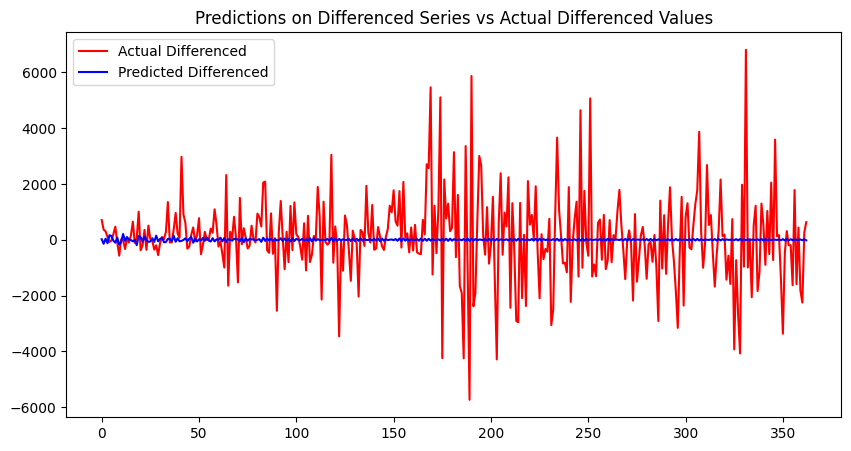

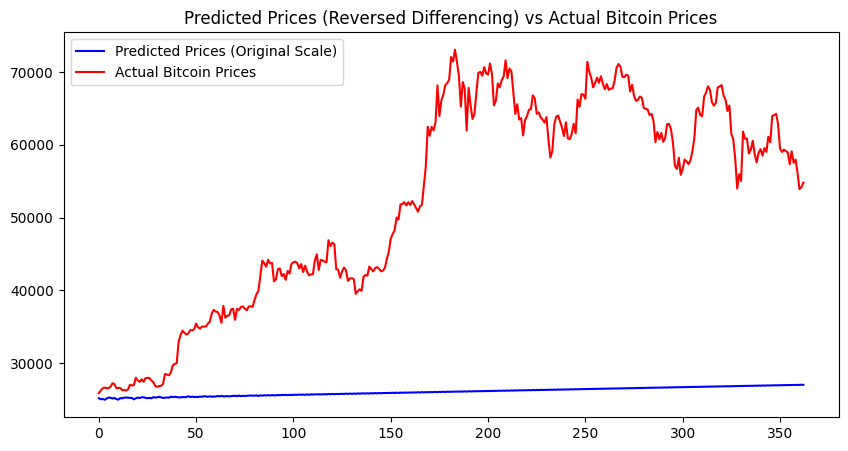

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test.reset_index(drop=True), label="Actual Differenced", color='red')
plt.plot(pred.reset_index(drop=True), label="Predicted Differenced", color='blue')
plt.title('Predictions on Differenced Series vs Actual Differenced Values')
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(pred_original_scale, label="Predicted Prices (Original Scale)", color='blue')
plt.plot(bitcoin_prices[split_size:].values, label="Actual Bitcoin Prices", color='red')
plt.title('Predicted Prices (Reversed Differencing) vs Actual Bitcoin Prices')
plt.legend()
plt.show()

# Model 5 : SARIMA

In [ ]:
pacf_ar_significant_lags = [4, 33]
acf_ma_significant_lags = [4, 33]
def fit_sarima(ar_order, ma_order):
    train_data = train_broadcast.value
    model = SARIMAX(train, order=(ar_order, 1, ma_order), seasonal_order=(0, 0, 0, 0))
    result = model.fit()
    return (ar_order, ma_order, result.aic, result.bic)

sarima_orders = list(product(pacf_ar_significant_lags, acf_ma_significant_lags))
sarima_order_rdd = sc.parallelize(sarima_orders)
sarima_results = sarima_order_rdd.map(lambda orders: fit_sarima(orders[0], orders[1])).collect()

In [ ]:
model = SARIMAX(train, order=(15, 1, 15), seasonal_order=(0, 0, 0, 0))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
pred = result.predict(start=len(train), end=len(differenced_series[1:])-1, dynamic=False)
pred.head()

,predicted_mean
2023-09-12,23.292473
2023-09-13,-140.598971
2023-09-14,42.598403
2023-09-15,-118.129932
2023-09-16,169.638241


In [ ]:
SARIMA_model_mse_d = mean_squared_error(test, pred)
print(f"MSE on Differenced Series: {SARIMA_model_mse_d}")
last_train_value = bitcoin_prices.iloc[split_size - 1]['Price']
pred_original_scale = [last_train_value + pred[0]]
for i in range(1, len(pred)):
    pred_original_scale.append(pred_original_scale[i-1] + pred[i])

SARIMA_model_mse_rd = mean_squared_error(bitcoin_prices[split_size:].values, pred_original_scale)
print(f"MSE on Reverse Differenced Series: {SARIMA_model_mse_rd}")

MSE on Differenced Series: 2289336.47688923
MSE on Reverse Differenced Series: 874879974.3008136


<ipython-input-62-6c25d59ca857>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_original_scale = [last_train_value + pred[0]]
<ipython-input-62-6c25d59ca857>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_original_scale.append(pred_original_scale[i-1] + pred[i])


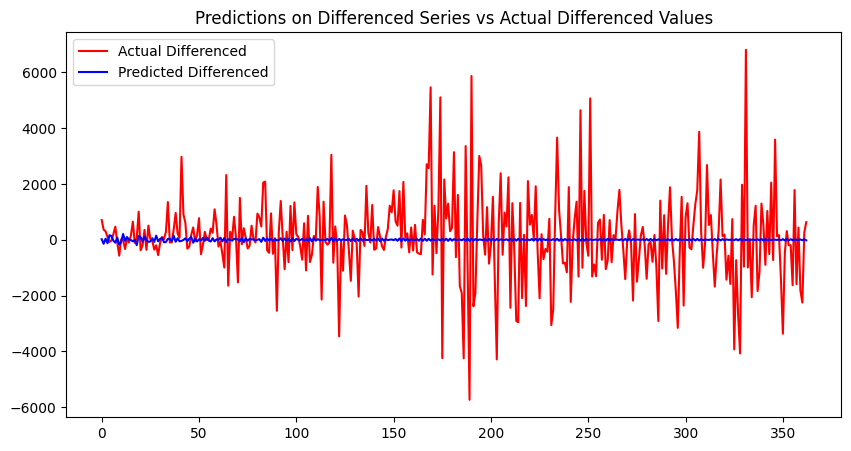

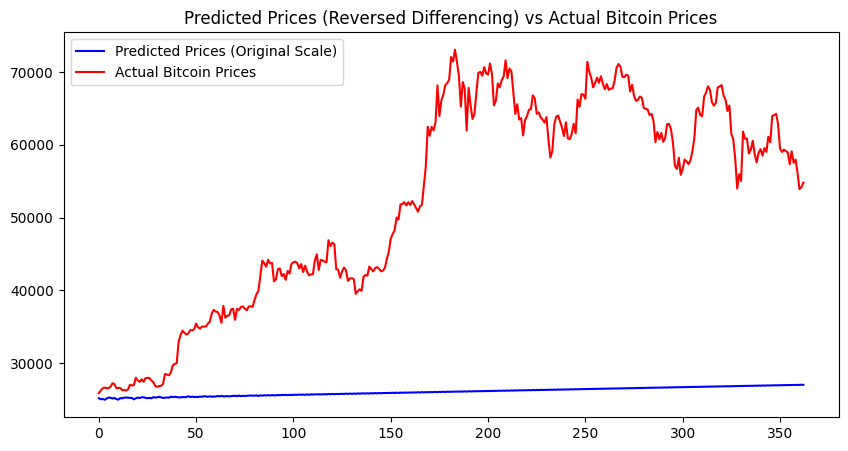

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test.reset_index(drop=True), label="Actual Differenced", color='red')
plt.plot(pred.reset_index(drop=True), label="Predicted Differenced", color='blue')
plt.title('Predictions on Differenced Series vs Actual Differenced Values')
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(pred_original_scale, label="Predicted Prices (Original Scale)", color='blue')
plt.plot(bitcoin_prices[split_size:].values, label="Actual Bitcoin Prices", color='red')
plt.title('Predicted Prices (Reversed Differencing) vs Actual Bitcoin Prices')
plt.legend()
plt.show()

# Model 6 : AutoARIMA

In [ ]:
model = pm.auto_arima(train,
                      seasonal=False,
                      stepwise=True,
                      suppress_warnings=True,
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=75774.628, Time=16.92 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=75806.075, Time=0.33 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=75806.084, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=75806.092, Time=1.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=75806.551, Time=4.55 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=75810.079, Time=1.17 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=75809.740, Time=4.67 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=75776.680, Time=20.56 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=75808.085, Time=0.93 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=75806.050, Time=5.80 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=75806.305, Time=4.71 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=75778.712, Time=22.21 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=24.99 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 108.466 seconds


In [ ]:
n_periods = len(test)
pred = model.predict(n_periods=n_periods)
pred.head()

,0
2023-09-12,27.895835
2023-09-13,24.338053
2023-09-14,-6.791319
2023-09-15,-28.907885
2023-09-16,-17.194053


In [ ]:
AutoARIMA_model_mse_d = mean_squared_error(test, pred)
print(f"MSE on Differenced Series: {AutoARIMA_model_mse_d}")
last_train_value = bitcoin_prices.iloc[split_size - 1]['Price']
pred_original_scale = [last_train_value + pred[0]]
for i in range(1, len(pred)):
    pred_original_scale.append(pred_original_scale[i-1] + pred[i])

AutoARIMA_model_mse_rd = mean_squared_error(bitcoin_prices[split_size:].values, pred_original_scale)
print(f"MSE on Reverse Differenced Series: {AutoARIMA_model_mse_rd}")

MSE on Differenced Series: 2281819.261843757
MSE on Reverse Differenced Series: 935092455.6761574


<ipython-input-66-77be22a927c7>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_original_scale = [last_train_value + pred[0]]
<ipython-input-66-77be22a927c7>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_original_scale.append(pred_original_scale[i-1] + pred[i])


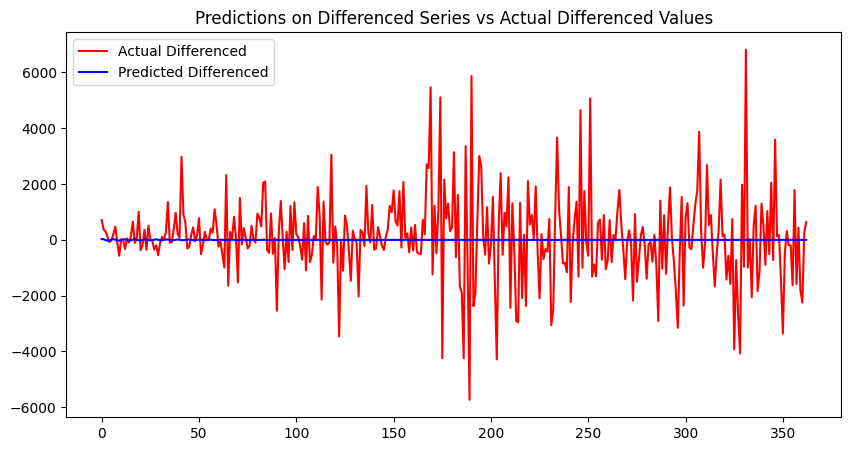

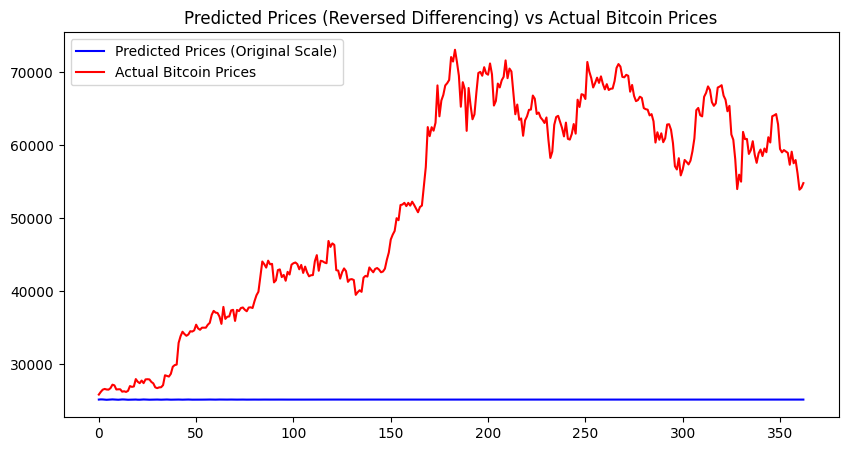

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test.reset_index(drop=True), label="Actual Differenced", color='red')
plt.plot(pred.reset_index(drop=True), label="Predicted Differenced", color='blue')
plt.title('Predictions on Differenced Series vs Actual Differenced Values')
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(pred_original_scale, label="Predicted Prices (Original Scale)", color='blue')
plt.plot(bitcoin_prices[split_size:].values, label="Actual Bitcoin Prices", color='red')
plt.title('Predicted Prices (Reversed Differencing) vs Actual Bitcoin Prices')
plt.legend()
plt.show()

# Model 7 : Naive Forecast

Naive forecast don't require stationary data so using original data instead of differentiated

In [22]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

In [23]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

In [24]:
split_size = int(0.93 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(4806, 362, 4806, 362)

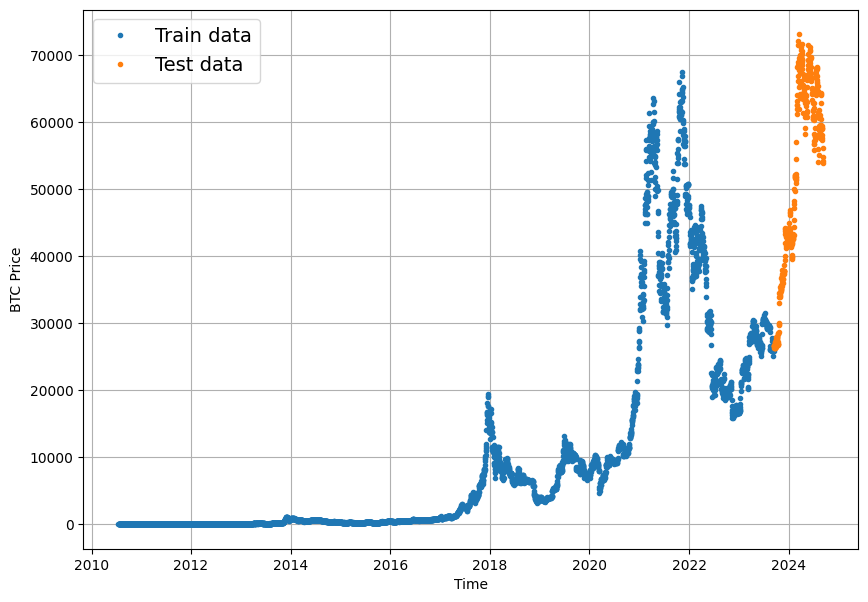

In [25]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [26]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([26222.02, 26528.22, 26627.69, 26553.13, 26531.4 , 26738.74,
        27211.2 , 27121.84, 26556.98, 26577.61]),
 array([59348.98, 59158.  , 58965.98, 57341.08, 59127.62, 57544.01,
        57984.05, 56170.04, 53922.68, 54188.32]))

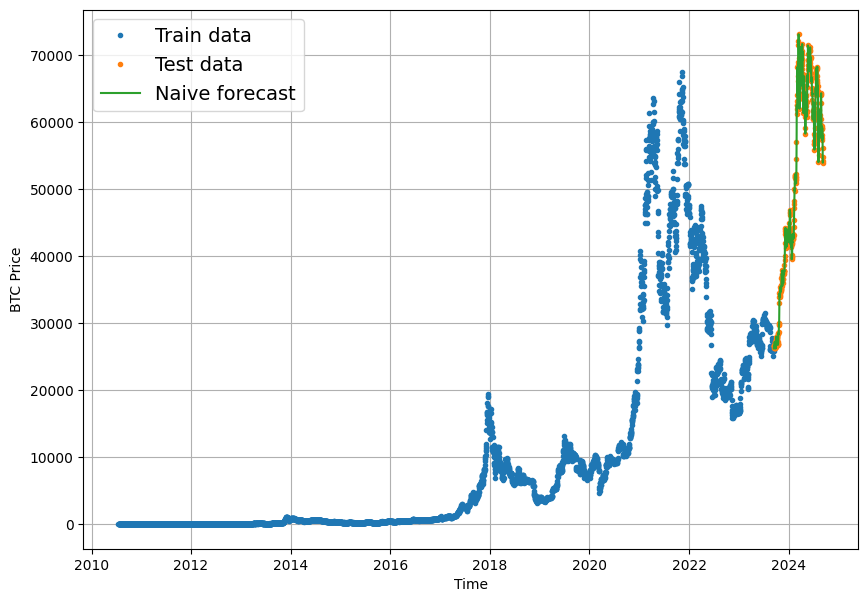

In [27]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

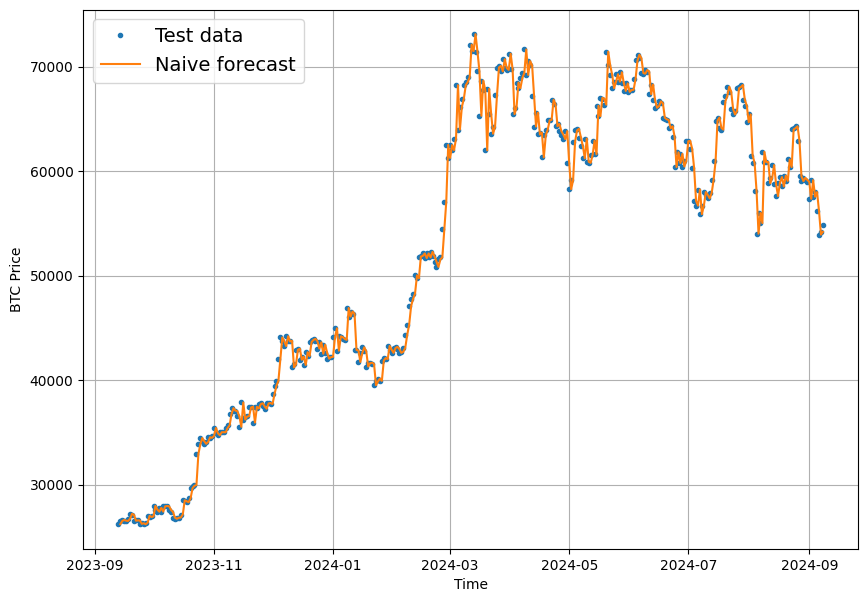

In [28]:
plt.figure(figsize=(10, 7))
offset = 0
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [29]:
NaiveForecast_model_mse = mean_squared_error(y_test[1:], naive_forecast)
NaiveForecast_model_mse

2292691.7578864265

# Model 8 : Exponential Smoothning

In [ ]:
model = SimpleExpSmoothing(train)
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
pred = result.forecast(steps=len(test))
pred.head()

,0
2023-09-12,-9.313231
2023-09-13,-9.313231
2023-09-14,-9.313231
2023-09-15,-9.313231
2023-09-16,-9.313231


In [ ]:
ExpSmooth_model_mse_d = mean_squared_error(test, pred)
print(f"MSE on Differenced Series: {ExpSmooth_model_mse_d}")
last_train_value = bitcoin_prices.iloc[split_size - 1]['Price']
pred_original_scale = [last_train_value + pred[0]]
for i in range(1, len(pred)):
    pred_original_scale.append(pred_original_scale[i-1] + pred[i])

ExpSmooth_model_mse_rd = mean_squared_error(bitcoin_prices[split_size:].values, pred_original_scale)
print(f"MSE on Reverse Differenced Series: {ExpSmooth_model_mse_rd}")

MSE on Differenced Series: 2283433.3673937283
MSE on Reverse Differenced Series: 1055474264.6391073


<ipython-input-74-0a248cf8ab54>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_original_scale = [last_train_value + pred[0]]
<ipython-input-74-0a248cf8ab54>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_original_scale.append(pred_original_scale[i-1] + pred[i])


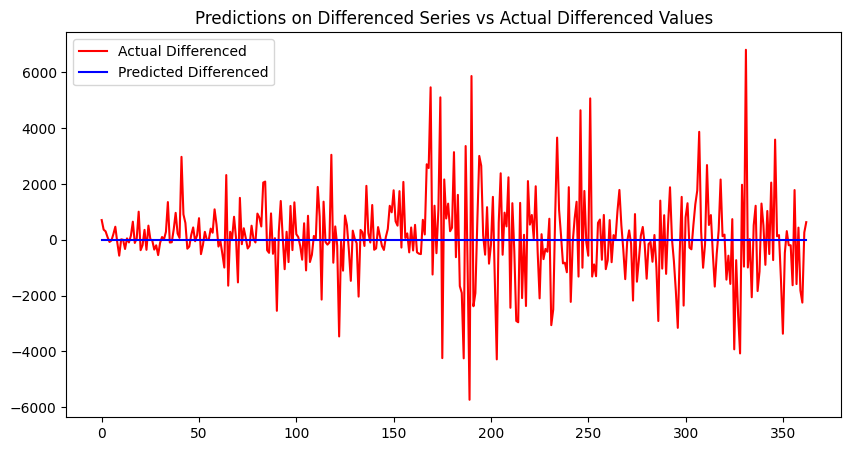

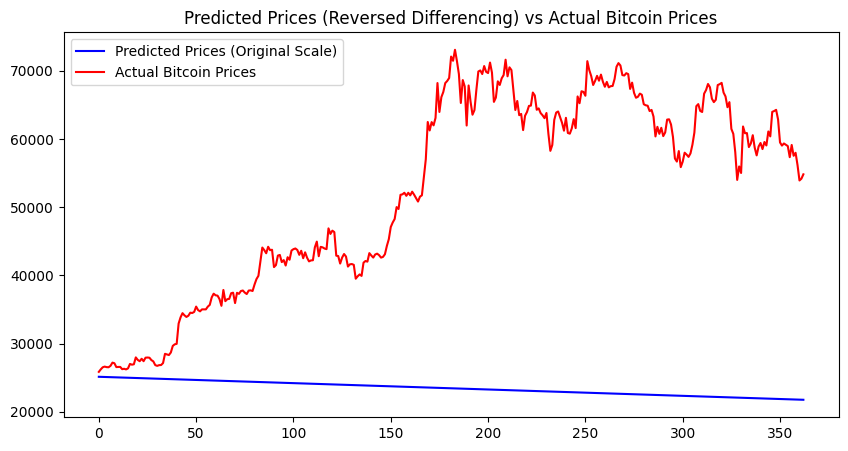

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test.reset_index(drop=True), label="Actual Differenced", color='red')
plt.plot(pred.reset_index(drop=True), label="Predicted Differenced", color='blue')
plt.title('Predictions on Differenced Series vs Actual Differenced Values')
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(pred_original_scale, label="Predicted Prices (Original Scale)", color='blue')
plt.plot(bitcoin_prices[split_size:].values, label="Actual Bitcoin Prices", color='red')
plt.title('Predicted Prices (Reversed Differencing) vs Actual Bitcoin Prices')
plt.legend()
plt.show()

# Model 9 : Random Forest

In [ ]:
!pip install tensorflow-decision-forests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 57.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

In [ ]:
def create_lagged_features(data, n_lags):
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i - n_lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [ ]:
n_lags = 3
X, y = create_lagged_features(prices, n_lags)
split_size = int(0.93 * len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

In [ ]:
def array_to_dataframe(X, y, column_prefix='feature'):
    feature_columns = [f"{column_prefix}_{i}" for i in range(X.shape[1])]
    df = pd.DataFrame(X, columns=feature_columns)
    df['target'] = y
    return df

train_df = array_to_dataframe(X_train, y_train)
test_df = array_to_dataframe(X_test, y_test)

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="target", task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="target", task=tfdf.keras.Task.REGRESSION)

In [ ]:
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
model.compile()

model.fit(train_ds)

Use /tmp/tmp1v8_8nhv as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.766951. Found 4803 examples.
Training model...
Model trained in 0:00:05.746827
Compiling model...
Model compiled.


In [ ]:
y_pred = model.predict(test_ds).squeeze()

1/1 [==============================] - 0s 114ms/step


In [ ]:
rf_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test set: {rf_mse}")

Mean Squared Error on test set: 6417812.525784762


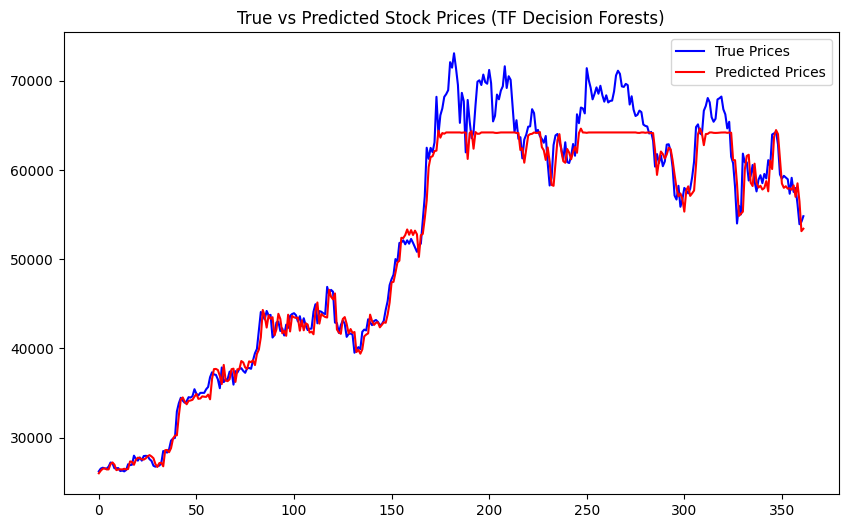

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='True Prices', color='blue')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Prices', color='red')
plt.title('True vs Predicted Stock Prices (TF Decision Forests)')
plt.legend()
plt.show()

# Model 10 : Gradient Boosted Trees

In [ ]:
model = tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.REGRESSION)
model.compile()

model.fit(train_ds)

Use /tmp/tmpoyswzvvj as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.240155. Found 4803 examples.
Training model...
Model trained in 0:00:00.330548
Compiling model...
Model compiled.


In [ ]:
y_pred = model.predict(test_ds).squeeze()

1/1 [==============================] - 0s 50ms/step


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test set: {mse}")

Mean Squared Error on test set: 6250224.14921147


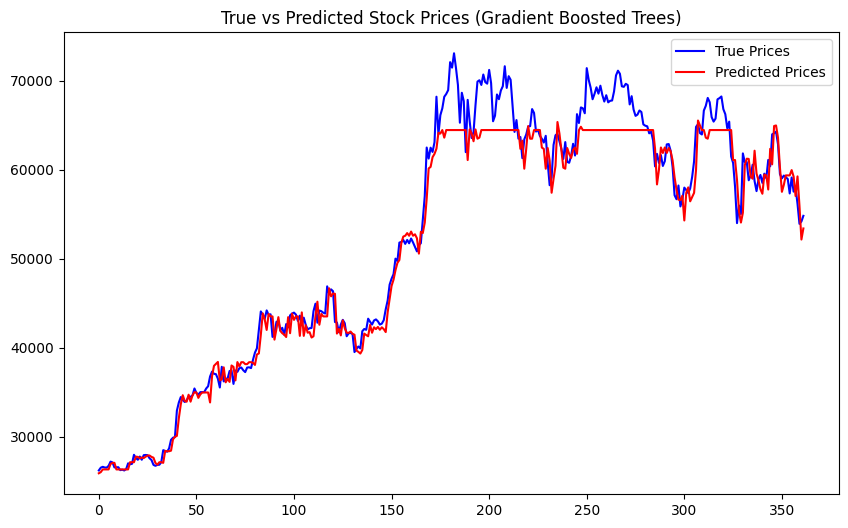

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='True Prices', color='blue')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Prices', color='red')
plt.title('True vs Predicted Stock Prices (Gradient Boosted Trees)')
plt.legend()
plt.show()

# Model 11 : Prophet

In [ ]:
!pip install prophet

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [ ]:
bitcoin_prices
bitcoin_prices = bitcoin_prices.rename(columns={'Price': 'y'})
bitcoin_prices = bitcoin_prices.rename_axis('ds')

In [ ]:
bitcoin_prices.head()

,y
ds,
2010-07-17,0.0500
2010-07-18,0.0858
2010-07-19,0.0808
2010-07-20,0.0747
2010-07-21,0.0792


In [ ]:
bitcoin_prices = bitcoin_prices.reset_index()
bitcoin_prices

,ds,y
0,2010-07-17,0.0500
1,2010-07-18,0.0858
2,2010-07-19,0.0808
3,2010-07-20,0.0747
4,2010-07-21,0.0792
...,...,...
5163,2024-09-04,57984.0500
5164,2024-09-05,56170.0400
5165,2024-09-06,53922.6800
5166,2024-09-07,54188.3200


In [ ]:
train = bitcoin_prices.iloc[:split_size]
test = bitcoin_prices.iloc[split_size:]
print(len(train)), print(len(test))

4805
363


(None, None)

In [ ]:
model = Prophet()
model.fit(train)
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcnu2s1s5/8vufu6_p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcnu2s1s5/4qapr6ev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10037', 'data', 'file=/tmp/tmpcnu2s1s5/8vufu6_p.json', 'init=/tmp/tmpcnu2s1s5/4qapr6ev.json', 'output', 'file=/tmp/tmpcnu2s1s5/prophet_modelc3dtgj12/prophet_model-20240919074259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5163,2024-09-04,13121.618497,2739.070512,22449.556682,4953.559193,20155.809377,-41.182928,-41.182928,-41.182928,17.736389,17.736389,17.736389,-58.919317,-58.919317,-58.919317,0.0,0.0,0.0,13080.435568
5164,2024-09-05,13097.627894,2189.985157,22381.970234,4862.499912,20180.759472,-131.618146,-131.618146,-131.618146,-16.490479,-16.490479,-16.490479,-115.127667,-115.127667,-115.127667,0.0,0.0,0.0,12966.009748
5165,2024-09-06,13073.637291,2193.556597,22028.807626,4771.440632,20205.709568,-184.564056,-184.564056,-184.564056,-12.289831,-12.289831,-12.289831,-172.274225,-172.274225,-172.274225,0.0,0.0,0.0,12889.073235
5166,2024-09-07,13049.646688,2001.794269,22473.184557,4670.014872,20208.215102,-229.585109,-229.585109,-229.585109,0.532796,0.532796,0.532796,-230.117906,-230.117906,-230.117906,0.0,0.0,0.0,12820.061578
5167,2024-09-08,13025.656085,2128.274184,21825.603349,4570.687910,20206.482272,-287.958427,-287.958427,-287.958427,0.458172,0.458172,0.458172,-288.416598,-288.416598,-288.416598,0.0,0.0,0.0,12737.697658


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5163,2024-09-04,13080.435568,2739.070512,22449.556682
5164,2024-09-05,12966.009748,2189.985157,22381.970234
5165,2024-09-06,12889.073235,2193.556597,22028.807626
5166,2024-09-07,12820.061578,2001.794269,22473.184557
5167,2024-09-08,12737.697658,2128.274184,21825.603349


In [ ]:
test.tail()

,ds,y
5163,2024-09-04,57984.05
5164,2024-09-05,56170.04
5165,2024-09-06,53922.68
5166,2024-09-07,54188.32
5167,2024-09-08,54823.96


In [ ]:
plot_plotly(model, forecast)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [ ]:
predictions = forecast.iloc[-len(test):]['yhat'].values
prophet_mse = mean_squared_error(test['y'].values, predictions)
prophet_mse

1473409821.572555

# Window Dataset Preperation

In [30]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/bitcoin_2010-07-17_2024-09-09.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[5]))

timesteps = timesteps[::-1]
btc_price = btc_price[::-1]

timesteps[:10], btc_price[:10]

([datetime.datetime(2010, 7, 18, 0, 0),
  datetime.datetime(2010, 7, 19, 0, 0),
  datetime.datetime(2010, 7, 20, 0, 0),
  datetime.datetime(2010, 7, 21, 0, 0),
  datetime.datetime(2010, 7, 22, 0, 0),
  datetime.datetime(2010, 7, 23, 0, 0),
  datetime.datetime(2010, 7, 24, 0, 0),
  datetime.datetime(2010, 7, 25, 0, 0),
  datetime.datetime(2010, 7, 26, 0, 0),
  datetime.datetime(2010, 7, 27, 0, 0)],
 [0.05, 0.0858, 0.0808, 0.0747, 0.0792, 0.0505, 0.0626, 0.0545, 0.0505, 0.056])

In [31]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2010-07-17T00:00:00.000000000', '2010-07-18T00:00:00.000000000',
        '2010-07-19T00:00:00.000000000', '2010-07-20T00:00:00.000000000',
        '2010-07-21T00:00:00.000000000', '2010-07-22T00:00:00.000000000',
        '2010-07-23T00:00:00.000000000', '2010-07-24T00:00:00.000000000',
        '2010-07-25T00:00:00.000000000', '2010-07-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([0.05  , 0.0858, 0.0808, 0.0747, 0.0792, 0.0505, 0.0626, 0.0545,
        0.0505, 0.056 ]))

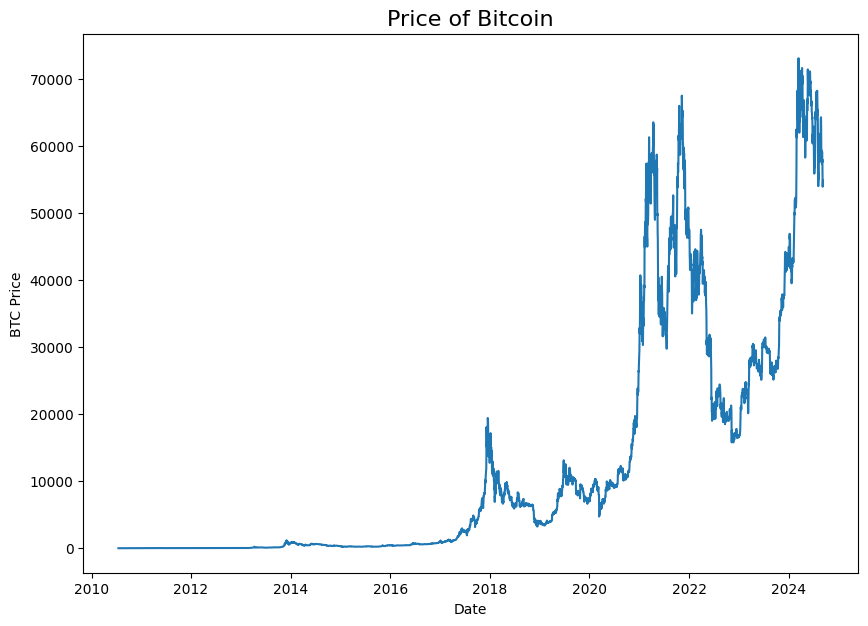

In [32]:
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [33]:
split_size = int(0.93 * len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(4806, 362, 4806, 362)

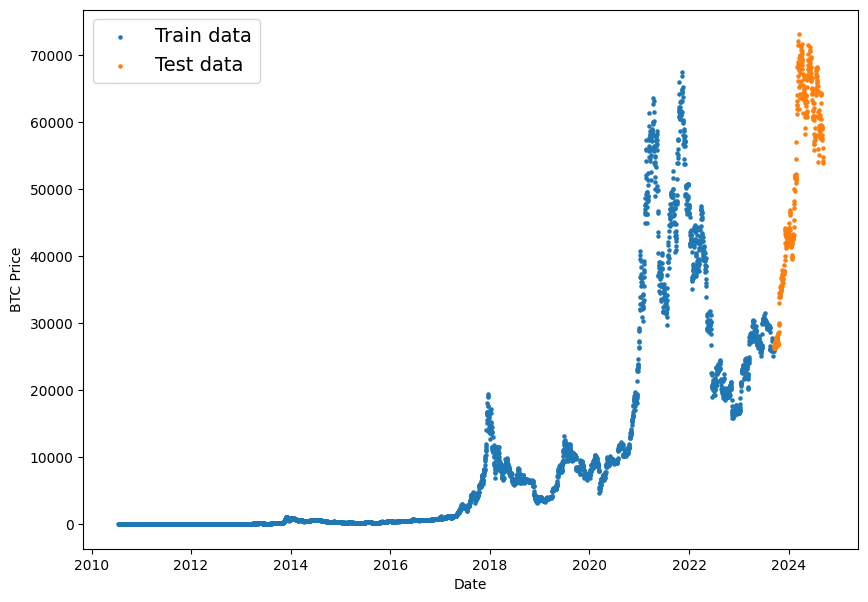

In [34]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

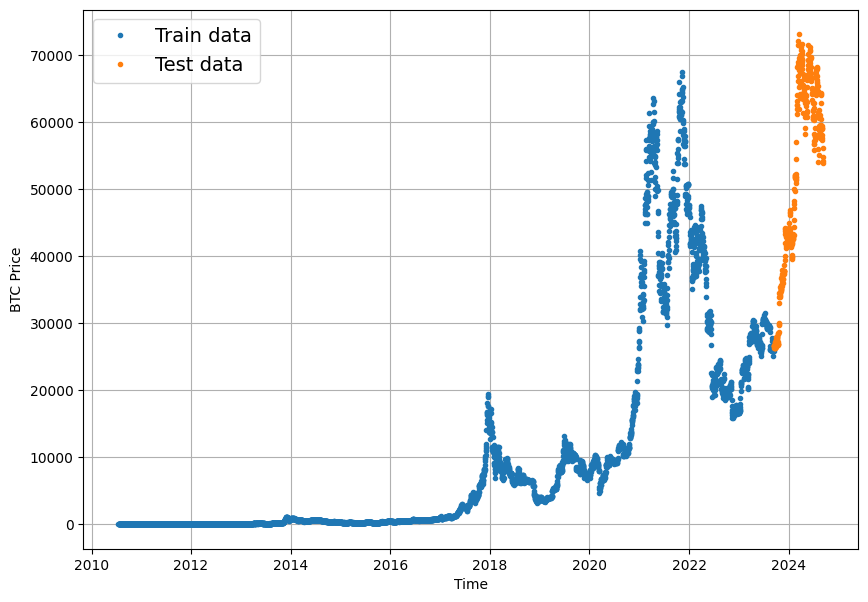

In [35]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [36]:
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [37]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  mae = tf.keras.metrics.MAE(y_true, y_pred)
  mse = tf.keras.metrics.MSE(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.MeanAbsolutePercentageError()(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

Window Dataset

In [38]:
HORIZON = 1
WINDOW_SIZE = 7

In [39]:
def get_labelled_windows(x, horizon = 1):
  return x[:, :-horizon], x[:, -horizon:]

In [40]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(tf.squeeze(test_window).numpy())
print(tf.squeeze(test_label).numpy())

[1 2 3 4 5 6 7]
8


In [41]:
def make_windows(x, window_size=7, horizon=1):
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
    start_indices = np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    window_indexes = window_step + start_indices
    windowed_array = x[window_indexes]
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    return windows, labels

In [42]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(5161, 5161)

In [43]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [0.05   0.0858 0.0808 0.0747 0.0792 0.0505 0.0626] -> Label: [0.0545]
Window: [0.0858 0.0808 0.0747 0.0792 0.0505 0.0626 0.0545] -> Label: [0.0505]
Window: [0.0808 0.0747 0.0792 0.0505 0.0626 0.0545 0.0505] -> Label: [0.056]


In [44]:
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [59158.   58965.98 57341.08 59127.62 57544.01 57984.05 56170.04] -> Label: [53922.68]
Window: [58965.98 57341.08 59127.62 57544.01 57984.05 56170.04 53922.68] -> Label: [54188.32]
Window: [57341.08 59127.62 57544.01 57984.05 56170.04 53922.68 54188.32] -> Label: [54823.96]


In [45]:
def make_train_test_splits(windows, labels, test_split=0.07):
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [46]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(4799, 362, 4799, 362)

In [ ]:
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name) + ".keras",
                                            verbose=0,
                                            save_best_only=True)

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

# Model 12 : Dense Model (Window = 7, Horizon = 1)

In [48]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_12_dense")

model_12.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_12.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_12.name)])

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 6609.3267 - mae: 6609.3267 - val_loss: 3817.3059 - val_mae: 3817.3059
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 624.5435 - mae: 624.5435 - val_loss: 1834.9366 - val_mae: 1834.9366
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 404.2073 - mae: 404.2073 - val_loss: 1537.4541 - val_mae: 1537.4541
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 387.5059 - mae: 387.5059 - val_loss: 1476.4583 - val_mae: 1476.4583
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 373.3814 - mae: 373.3814 - val_loss: 1417.9764 - val_mae: 1417.9764
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 351.4193 - mae: 351.4193 - val_loss: 1523.4330 - val_mae: 1523.4330
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 351.6847 - mae: 351.6847 - val_loss: 1377.3175 - val_mae: 1377.3175
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 336.6773 - mae: 336.6773 - val_loss: 1814.0055 - v

In [49]:
model_12.evaluate(test_windows, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 786.9585 - mae: 786.9585 


[1034.67138671875, 1034.67138671875]

In [80]:
model_12_preds = make_preds(model_12, test_windows)
len(model_12_preds), model_12_preds[:10]

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(362,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([25702.533, 26076.143, 26492.988, 26556.143, 26490.69 , 26477.06 ,
        26646.986, 27103.006, 27079.873, 26556.697], dtype=float32)>)

In [52]:
print(test_windows)

[[25771.63 26200.96 25910.51 ... 25841.65 25143.63 25854.29]
 [26200.96 25910.51 25893.13 ... 25143.63 25854.29 26222.02]
 [25910.51 25893.13 25841.65 ... 25854.29 26222.02 26528.22]
 ...
 [59158.   58965.98 57341.08 ... 57544.01 57984.05 56170.04]
 [58965.98 57341.08 59127.62 ... 57984.05 56170.04 53922.68]
 [57341.08 59127.62 57544.01 ... 56170.04 53922.68 54188.32]]


In [58]:
test_preds = make_preds(model_12, tf.constant([[66126.06 , 652348.77 , 62624.83 , 63264.547, 61434.28 , 64853.605, 61488.824]]))
test_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=95851.96>

In [81]:
model_12_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_12_preds)
model_12_results

{'mae': 1034.6714,
 'mse': 2307929.8,
 'rmse': 1519.1873,
 'mape': 1.9018054,
 'mase': 1.0024269}

In [85]:
print(len(X_test[-len(test_windows):]))
print(len(y_test))

362
362
362


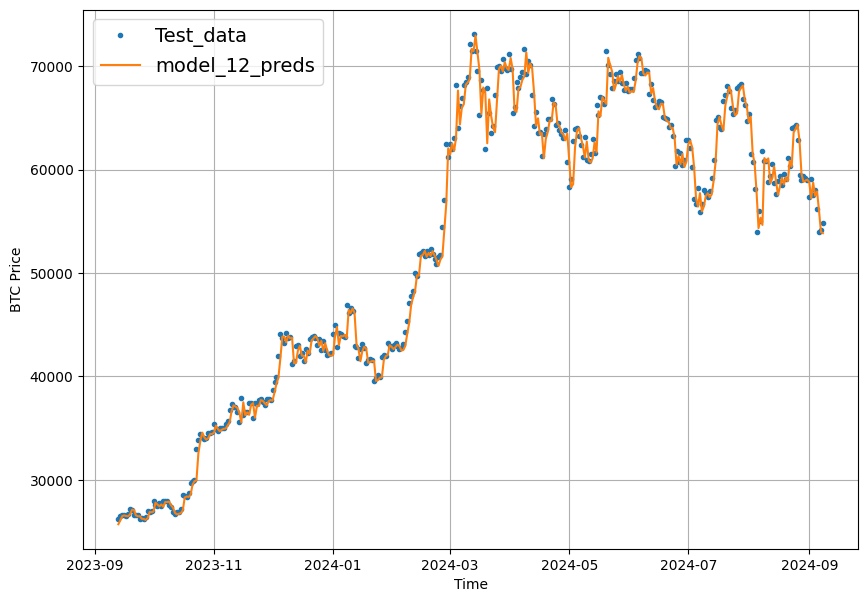

In [86]:
offset = 0
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=y_test, start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_12_preds, start=offset, format="-", label="model_12_preds")

# Model 13 : Dense (Window = 30, Horizon = 1)

In [87]:
HORIZON = 1
WINDOW_SIZE = 30

In [88]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(5138, 5138)

In [89]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(4778, 360, 4778, 360)

In [92]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_13_dense")

model_13.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_13.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_13.name)])

In [93]:
model_13.evaluate(test_windows, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1321.6570


1608.2540283203125

In [95]:
model_13_preds = make_preds(model_13,
                           input_data=test_windows)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [96]:
model_13_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_13_preds)
model_13_results

{'mae': 1608.2538,
 'mse': 4246209.5,
 'rmse': 2060.6333,
 'mape': 3.043607,
 'mase': 1.5511904}

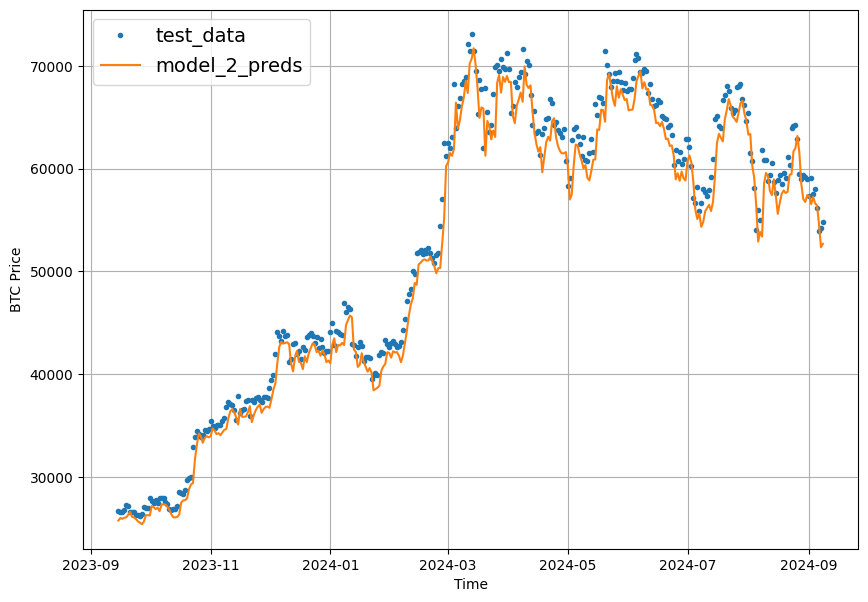

In [98]:
offset = 0
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_13_preds, start=offset, format="-", label="model_2_preds")

# Model 14 : Dense (Window = 30, horizon = 7)

In [99]:
HORIZON = 7
WINDOW_SIZE = 30
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(5132, 5132)

In [100]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.07)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(4772, 360, 4772, 360)

In [101]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_14_dense")

model_14.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_14.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_14.name)])

In [103]:
model_14.evaluate(test_windows, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1680.4333


2147.932861328125

In [104]:
model_14_preds = make_preds(model_14, input_data=test_windows)
model_14_preds[:5]

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[26497.482, 26331.516, 25812.809, 25953.967, 26282.027, 25145.818,
        25620.92 ],
       [26311.06 , 26178.762, 25747.238, 25678.607, 26217.07 , 24971.1  ,
        25228.459],
       [26332.088, 26004.605, 25465.953, 25530.502, 26288.916, 25146.246,
        25364.662],
       [25998.264, 25415.703, 24926.488, 24940.154, 25836.613, 24590.693,
        25051.459],
       [26141.709, 25866.574, 25189.904, 25512.588, 25875.031, 25199.955,
        25046.107]], dtype=float32)>

In [112]:
model_14_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_14_preds)

In [106]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  mae = tf.keras.metrics.MAE(y_true, y_pred)
  mse = tf.keras.metrics.MSE(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.MeanAbsolutePercentageError()(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [107]:
model_14_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_14_preds)
model_14_results

{'mae': 2147.933,
 'mse': 8913098.0,
 'rmse': 2496.7751,
 'mape': 4.0312147,
 'mase': 2.0836036}

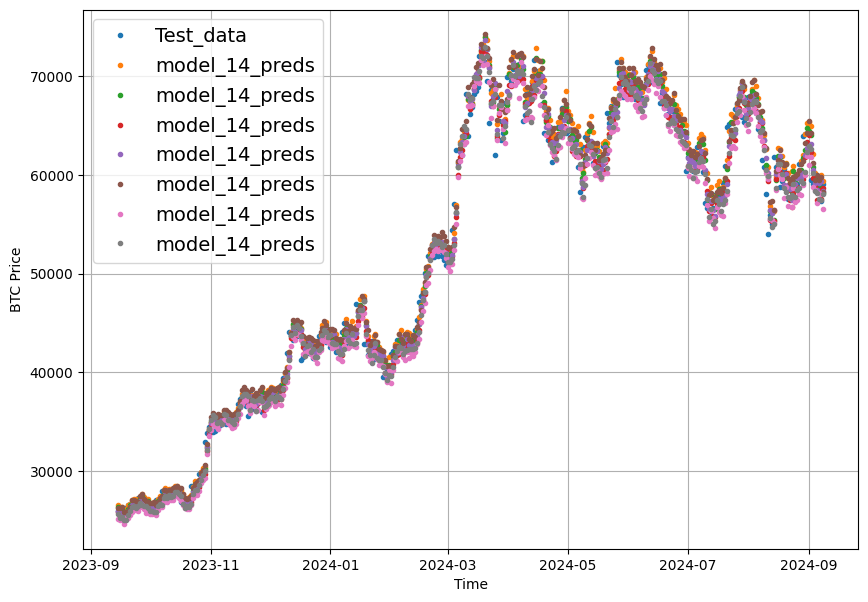

In [108]:
offset = 0
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_14_preds, start=offset, label="model_14_preds")

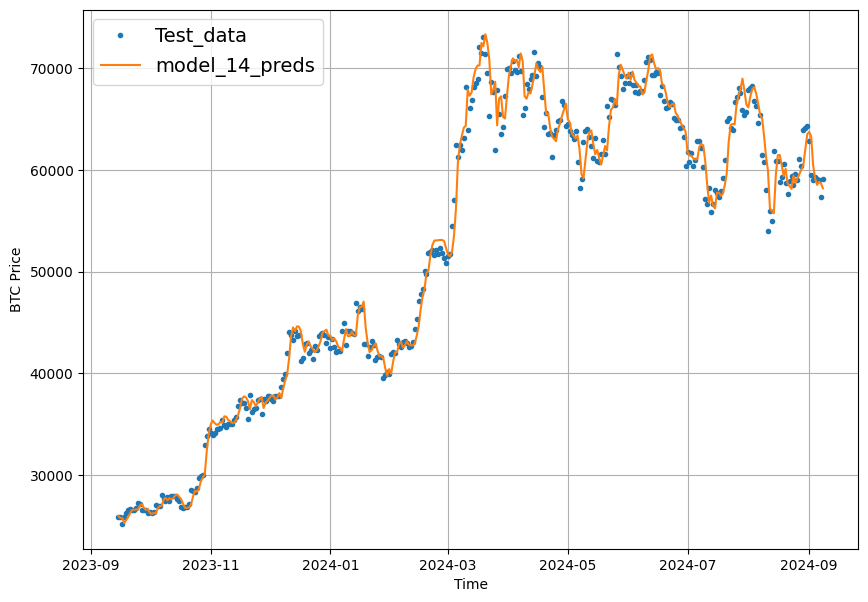

In [110]:
offset = 0
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_14_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_14_preds")

# Model 15 : Conv1D

In [113]:
HORIZON = 1
WINDOW_SIZE = 7

In [114]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(5161, 5161)

In [115]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(4799, 362, 4799, 362)

In [116]:
train_windows[0].shape

(7,)

In [118]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [119]:
tf.random.set_seed(42)
model_15 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_15_conv1D")

model_15.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_15.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_15.name)])

In [120]:
model_15.summary()

Model: "model_15_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_2 (Lambda)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [124]:
model_15.evaluate(test_windows, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1295.0486


1557.6080322265625

In [125]:
model_15_preds = make_preds(model_15, test_windows)
model_15_preds[:10]

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([25137.268, 25538.924, 25925.592, 26047.514, 25965.205, 25935.965,
       26091.193, 26532.463, 26533.252, 26029.455], dtype=float32)>

In [126]:
model_15_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_15_preds)
model_15_results

{'mae': 1557.608,
 'mse': 3981636.5,
 'rmse': 1995.4038,
 'mape': 2.9634902,
 'mase': 1.5090666}

In [127]:
model_15_preds.shape

TensorShape([362])

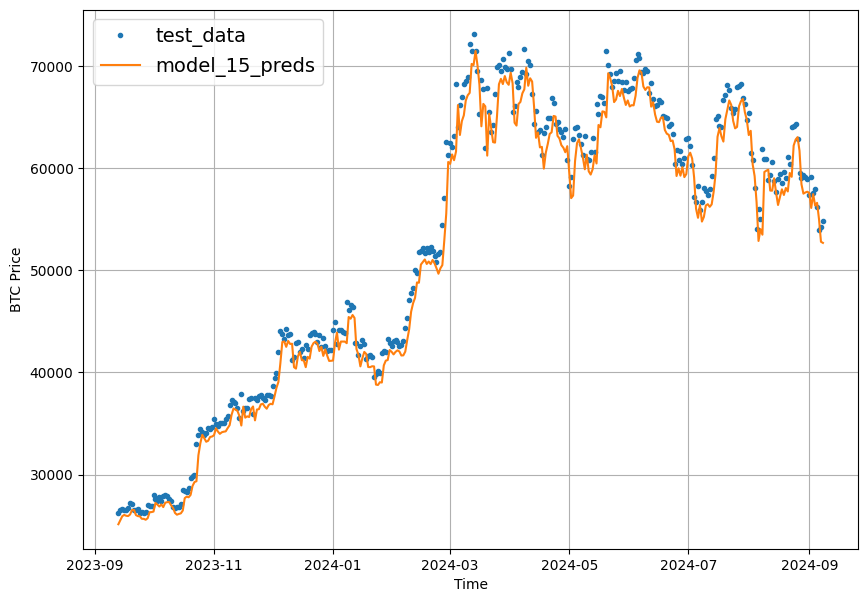

In [128]:
offset = 0
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.squeeze(model_15_preds), start=offset, format="-", label="model_15_preds")

# Model 16 : LSTM

In [132]:
tf.random.set_seed(42)
inputs = layers.Input(shape=(WINDOW_SIZE,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
x = layers.LSTM(128, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_16 = tf.keras.Model(inputs=inputs, outputs = output, name = "model_16_LSTM")

model_16.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_16.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_16.name)])

In [133]:
model_16.evaluate(test_windows, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 797.8987 


1040.5687255859375

In [134]:
model_16_preds = make_preds(model_16, test_windows)
model_16_preds[:10]

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([25626.807, 26049.076, 26382.738, 26587.863, 26496.38 , 26465.19 ,
       26611.748, 27037.559, 27062.22 , 26586.434], dtype=float32)>

In [135]:
model_16_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_16_preds)
model_16_results

{'mae': 1040.5687,
 'mse': 2334383.0,
 'rmse': 1527.8688,
 'mape': 1.91982,
 'mase': 1.0081403}

In [136]:
model_16_preds.shape

TensorShape([362])

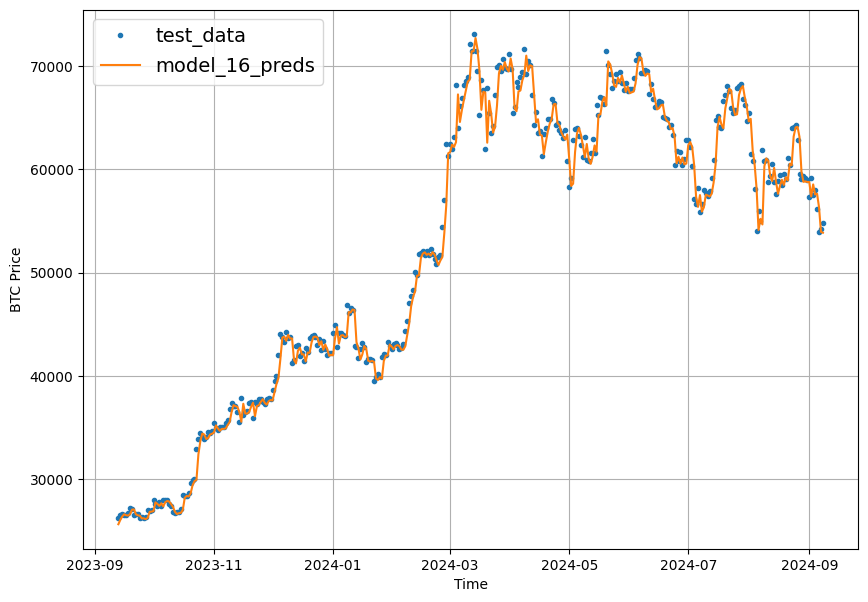

In [138]:
offset = 0
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.squeeze(model_16_preds), start=offset, format="-", label="model_16_preds")

# Model 17 : Dense (Multivariate Time series)